In [1]:
#Checken der Working Directory
%pwd

'C:\\Users\\Yusuf Konyalicetin'

In [10]:
import os

os.chdir('C:\\Users\Yusuf Konyalicetin\Desktop\Github Airbnb\AirbnbAnalyticsBerlin(final)')

In [2]:
#Laden der Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Sonstige Module und Funktionen
from time import gmtime, strftime #Für die aktuelle Zeit

import warnings

In [3]:
#Pandas - Mehr Zeilen und Spalten anzeigen
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#Seaborn
sns.set_style("darkgrid")
plt.matplotlib.style.use('default')

my_colors = ["windows blue", "saffron", "hot pink", "algae green", "dusty purple", "greyish", "petrol", "denim blue", "lime"]
sns.set_palette(sns.xkcd_palette(my_colors))
colors = sns.xkcd_palette(my_colors)

#Warnings
warnings.filterwarnings("ignore")

In [5]:
def my_df_summary(data):
    '''Eigene Funktion für die Summary'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.min(), dat.max(), dat.mean(), dat.std(), dat.isna().sum(), dat.nunique(), dat.dtypes],
        index=['Minimum', 'Maximum', 'Mittelwert', 'Stand. Abw.','#NA', '#Uniques', 'dtypes']) 
        return df
    except:
        print('Es konnte keine Summary erstellt werden.')
    return data

In [5]:
#Alle Dateien die in Working Directory enthalten sind
!dir

 Datentr„ger in Laufwerk C: ist SystemVHD
 Volumeseriennummer: 9A99-141E

 Verzeichnis von C:\Users\Alfa\Desktop\berlin-airbnb-data

29.04.2020  10:56    <DIR>          .
29.04.2020  10:56    <DIR>          ..
28.04.2020  16:38    <DIR>          .ipynb_checkpoints
24.04.2020  13:43       197.617.255 calendar_summary.csv
27.04.2020  16:12    <DIR>          Exploratory Data Analysis and Visualization of Airbnb Dataset-Dateien
27.04.2020  16:12        50.932.321 Exploratory Data Analysis and Visualization of Airbnb Dataset.html
27.04.2020  16:34        84.985.154 listings.csv
27.04.2020  16:10        28.748.006 listings_cleaned.xlsx
27.04.2020  16:52         3.875.494 listings_summary.csv
27.04.2020  16:57           751.619 neighbourhoods.geojson
27.04.2020  16:34        10.611.514 reviews.csv
27.04.2020  16:57       159.683.506 reviews_detailed.csv
27.04.2020  16:57        10.611.514 reviews_summary.csv
29.04.2020  10:56         2.007.040 Zeitreihenanalyse_Airbnb_Kay_Yusuf.ipynb
        

In [13]:
#Einlesen der einzelnen Datensätze
#neighbourhoods = pd.read_csv('neighbourhoods.csv')
reviews_detailed = pd.read_csv('reviews_detailed.csv')
#reviews = pd.read_csv('reviews.csv')
listings = pd.read_csv('listings.csv')
#listings_summary = pd.read_csv('listings_summary.csv')

In [14]:
reviews_detailed.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a..."
1,3176,134722,2010-11-07,263467,George,Britta's apartment in Berlin is in a great are...
2,3176,144064,2010-11-24,76726,Patricia,"Fantastic, large place in good location. Only ..."
3,3176,156702,2010-12-21,291657,Benedetta,L'appartamento di Britta è molto largo carino ...
4,3176,165048,2011-01-04,279789,Aude,We went in Berlin for the new year eve. The ap...


In [15]:
#len(reviews)

NameError: name 'reviews' is not defined

In [9]:
#reviews.head()

,listing_id,date
0,3176,2009-06-20
1,3176,2010-11-07
2,3176,2010-11-24
3,3176,2010-12-21
4,3176,2011-01-04


In [16]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200317045838,2020-03-17,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",NaN,NaN,https://a0.muscache.com/im/pictures/243355/84a...,NaN,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.53500,13.41758,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00,62,1125,62,62,1125,1125,62.0,1125.0,3 weeks ago,t,0,0,0,140,2020-03-17,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
1,3309,https://www.airbnb.com/rooms/3309,20200317045838,2020-03-17,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,NaN,NaN,https://a0.muscache.com/im/pictures/29054294/b...,NaN,4108,https://www.airbnb.com/users/show/4108,Jana,2008-11-07,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,within a day,100%,100%,f,https:

In [17]:
df = pd.read_csv("listings.csv")
list_drop=["listing_url","scrape_id","last_scraped","experiences_offered",
"thumbnail_url","medium_url","picture_url","xl_picture_url","host_url",
"host_thumbnail_url","host_picture_url","minimum_minimum_nights","maximum_minimum_nights",
"minimum_maximum_nights","maximum_maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm",
"calendar_last_scraped"]
[df.drop(x, axis=1, inplace=True) for x in list_drop]
df.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.53500,13.41758,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00,62,1125,3 weeks ago,t,0,0,0,140,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
1,3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,4108,Jana,2008-11-07,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,within a day,100%,100%,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.49885,13.34906,t,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets live on this property"",Ca...",0.0,$28.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,7,35,2 months ago,t,0,15,45,320,27,1,2013-08-12,2019-05-31,89.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,The emerging and upcoming East of the new hip ...,Information on Berlin Citytax: English (Websit.

In [18]:
df2 = pd.merge(left=reviews_detailed, right=df, how='left', left_on='listing_id', right_on='id')

In [19]:
df2.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a...",3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.535,13.41758,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00,62,1125,3 weeks ago,t,0,0,0,140,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
1,3176,134722,2010-11-07,263467,George,Britta's apartment in Berlin is in a great are...,3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.535,13.41758,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00,62,1125,3 weeks ago,t,0,0,0,140,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
2,3176,14

In [20]:
df2.tail()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
545698,42834377,618992514,2020-03-16,154043872,Gui,Great stay :) the room is very comfortable and...,42834377,Large private room located in heart of the city,"Bright spacious room in the heart of the city,...",NaN,"Bright spacious room in the heart of the city,...",NaN,NaN,NaN,NaN,NaN,NaN,291833531,Nicholas,2019-09-04,"London, England, United Kingdom",NaN,within an hour,100%,100%,f,NaN,0.0,0.0,"['email', 'phone']",t,f,"Berlin, Berlin, Germany",Friedrichshain,Karl-Marx-Allee-Nord,Friedrichshain-Kreuzberg,Berlin,Berlin,10249,Berlin,"Berlin, Germany",DE,Germany,52.51732,13.45108,t,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Heating,""Smoke...",NaN,$45.00,NaN,NaN,$0.00,$20.00,1,$0.00,1,1125,5 days ago,t,1,7,7,7,1,1,2020-03-16,2020-03-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,t,f,flexible,f,f,1,0,1,0,1.0
545699,42836274,616942784,2020-03-11,222713355,Alex,The host canceled this reservation 10 days bef...,42836274,"Schöne WG im GRÜNEN, und doch SEHR ZENTRAL","Im Grünen, und trotzdem SEHR ZENTRAL.","-Seen, Berge -Sport -Grün Nicht Rauchen","Im Grünen, und trotzdem SEHR ZENTRAL. -Seen, B...",-Scheune- Traditionelle Deutsche Küche -Italie...,NaN,Sehr gute & zeitnahe Anbindung zur Messe & Gru...,NaN,Immer verfügbar.,NaN,341144418,Jean,2020-03-10,DE,NaN,NaN,NaN,100%,f,NaN,0.0,0.0,['phone'],t,f,"Berlin, Berlin, Germany",Westend,Heerstrasse,Charlottenburg-Wilm.,Berlin,Berlin,14055,Berlin,"Berlin, Germany",DE,Germany,52.49391,13.26076,t,Apartment,Private room,1,1.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Breakfast,...",NaN,$20.00,NaN,NaN,NaN,NaN,1,$0.00,1,30,5 days ago,t,4,20,50,140,1,1,2020-03-11,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,t,f,flexible,f,f,1,0,1,0,1.0
545700,42850717,618998357,2020-03-16,4816190,Leah,Very efficient little apartment in a great loc...,42850717,4R Wonderful 2 bedroom apartment in Berlin Mitte,"Stylish apartment in Berlin Mitte, next to the...",NaN,"Stylish apartment in Berlin Mitte, next to the...",Next to the Wall Memorial Park and surrounded ...,NaN,NaN,NaN,NaN,NaN,338955815,Georgy,2020-02-26,GB,NaN,within an hour,100%,100%,f,NaN,3.0,3.0,"['email', 'phone']",t,f,"Berlin, Berlin, Germany",Wedding,Brunnenstr. Nord,Mitte,Berlin,Berlin,13355,Berlin,"Berlin, Germany",DE,Germany,52.53830,13.39329,t,Apartment,Entire home/apt,7,1.0,1.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",NaN,$80.00,NaN,NaN,$0.00,$30.00,4,$20.00,1,1125,6 days ago,t,30,56,86,361,1,1,2020-03-16,2020-03-

In [21]:
df2

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a...",3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.53500,13.41758,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00,62,1125,3 weeks ago,t,0,0,0,140,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
1,3176,134722,2010-11-07,263467,George,Britta's apartment in Berlin is in a great are...,3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.53500,13.41758,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00,62,1125,3 weeks ago,t,0,0,0,140,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
2,317

In [22]:
df2.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_dep

In [23]:
#Filtern des Datensatzes für Zeitreihenanalyse
df_TS = df2[['listing_id', 'date', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]

In [24]:
df_TS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545703 entries, 0 to 545702
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   listing_id                    545703 non-null  int64 
 1   date                          545703 non-null  object
 2   neighbourhood                 545703 non-null  object
 3   neighbourhood_cleansed        545703 non-null  object
 4   neighbourhood_group_cleansed  545703 non-null  object
dtypes: int64(1), object(4)
memory usage: 25.0+ MB


In [25]:
df2['neighbourhood_group_cleansed'].unique()

array(['Pankow', 'Tempelhof - Schöneberg', 'Friedrichshain-Kreuzberg',
       'Neukölln', 'Mitte', 'Charlottenburg-Wilm.', 'Treptow - Köpenick',
       'Steglitz - Zehlendorf', 'Reinickendorf', 'Lichtenberg',
       'Marzahn - Hellersdorf', 'Spandau'], dtype=object)

In [26]:
df2['neighbourhood_cleansed'].unique()

array(['Prenzlauer Berg Südwest', 'Schöneberg-Nord',
       'Frankfurter Allee Süd FK', 'Helmholtzplatz',
       'Prenzlauer Berg Nordwest', 'nördliche Luisenstadt',
       'Reuterstraße', 'südliche Luisenstadt', 'Brunnenstr. Süd',
       'Tempelhofer Vorstadt', 'Prenzlauer Berg Süd', 'Moabit Ost',
       'Otto-Suhr-Allee', 'Schillerpromenade', 'Alt  Treptow',
       'Alexanderplatz', 'Neue Kantstraße', 'Ostpreußendamm',
       'Neuköllner Mitte/Zentrum', 'Prenzlauer Berg Nord', 'Kantstraße',
       'Schmargendorf', 'Regierungsviertel', 'Frankfurter Allee Nord',
       'Kurfürstendamm', 'Schöneberg-Süd',
       'Blankenfelde/Niederschönhausen', 'Südliche Friedrichstadt',
       'Moabit West', 'Wiesbadener Straße', 'West 3', 'Neu Lichtenberg',
       'Blankenburg/Heinersdorf/Märchenland', 'Friedenau',
       'Brunnenstr. Nord', 'Ost 2', 'Volkspark Wilmersdorf',
       'Pankow Zentrum', 'Osloer Straße', 'Drakestr.', 'West 1',
       'Prenzlauer Berg Ost', 'Buckow Nord', 'Pankow Süd', 'Ha

In [27]:
df2['neighbourhood'].unique()

array(['Prenzlauer Berg', 'Schöneberg', 'Friedrichshain', 'Kreuzberg',
       'Neukölln', 'Mitte', 'Moabit', 'Charlottenburg', 'Alt-Treptow',
       'Lichterfelde', 'Schmargendorf', 'Niederschönhausen',
       'Wilmersdorf', 'Tegel', 'Rummelsburg', 'Heinersdorf', 'Friedenau',
       'Wedding', 'Reinickendorf', 'Pankow', 'Buckow', 'Halensee',
       'Karlshorst', 'Lichtenberg', 'Zehlendorf', 'Tiergarten', 'Rudow',
       'Altglienicke', 'Hansaviertel', 'Lichtenrade', 'Westend',
       'Mahlsdorf', 'Biesdorf', 'Wannsee', 'Johannisthal', 'Konradshöhe',
       'Marienfelde', 'Wilhelmstadt', 'Steglitz', 'Baumschulenweg',
       'Nikolassee', 'Karow', 'Tempelhof', 'Rahnsdorf', 'Schmöckwitz',
       'Kladow', 'Weißensee', 'Alt-Hohenschönhausen', 'Britz', 'Wittenau',
       'Hellersdorf', 'Marzahn', 'Oberschöneweide', 'Märkisches Viertel',
       'Plänterwald', 'Dahlem', 'Frohnau', 'Adlershof', 'Friedrichshagen',
       'Wilhelmsruh', 'Französisch Buchholz', 'Grunewald', 'Gropiusstadt',
      

In [28]:
df_TS[['neighbourhood']]

,neighbourhood
0,Prenzlauer Berg
1,Prenzlauer Berg
2,Prenzlauer Berg
3,Prenzlauer Berg
4,Prenzlauer Berg
...,...
545698,Friedrichshain
545699,Westend
545700,Wedding
545701,Lichtenberg


In [29]:
df_TS['date'] = pd.to_datetime(df_TS['date'])

In [30]:
df_TS.groupby('neighbourhood_group_cleansed').count()

,listing_id,date,neighbourhood,neighbourhood_cleansed
neighbourhood_group_cleansed,,,,
Charlottenburg-Wilm.,41584,41584,41584,41584
Friedrichshain-Kreuzberg,124096,124096,124096,124096
Lichtenberg,14989,14989,14989,14989
Marzahn - Hellersdorf,3291,3291,3291,3291
Mitte,140965,140965,140965,140965
Neukölln,59518,59518,59518,59518
Pankow,97839,97839,97839,97839
Reinickendorf,7291,7291,7291,7291
Spandau,2376,2376,2376,2376


In [31]:
df_TS

,listing_id,date,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,3176,2009-06-20,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
1,3176,2010-11-07,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
2,3176,2010-11-24,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
3,3176,2010-12-21,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
4,3176,2011-01-04,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
...,...,...,...,...,...
545698,42834377,2020-03-16,Friedrichshain,Karl-Marx-Allee-Nord,Friedrichshain-Kreuzberg
545699,42836274,2020-03-11,Westend,Heerstrasse,Charlottenburg-Wilm.
545700,42850717,2020-03-16,Wedding,Brunnenstr. Nord,Mitte
545701,42852486,2020-03-12,Lichtenberg,Alt-Lichtenberg,Lichtenberg


In [32]:
df_TS.set_index('date', inplace=True)

In [33]:
df_TS.groupby('date').count()

,listing_id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
date,,,,
2009-06-20,1,1,1,1
2009-08-18,1,1,1,1
2009-11-25,1,1,1,1
2010-02-15,1,1,1,1
2010-02-18,1,1,1,1
...,...,...,...,...
2020-03-13,175,175,175,175
2020-03-14,129,129,129,129
2020-03-15,239,239,239,239


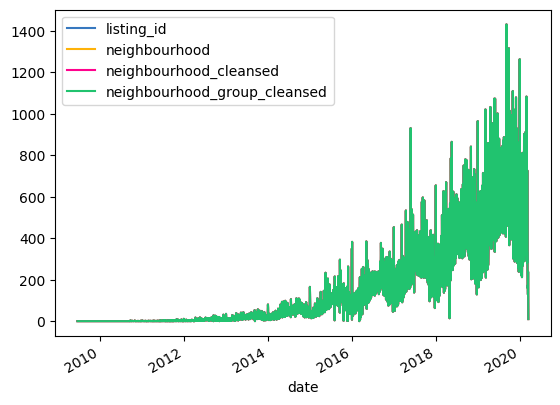

In [34]:
df_TS.groupby('date').count().plot()

### Frequenzen

In [35]:
df_ = df2.copy()

s_Dates = pd.to_datetime(df_.iloc[:,2], format='%Y-%m-%d', errors='ignore')

#Mit "Nummer" des Wochentages
df_NuDay = pd.DataFrame(s_Dates.dt.dayofweek.value_counts(dropna=False))
df_NuDay = df_NuDay.reset_index()
df_NuDay.columns=['#Tag', 'Anzahl']

#Mit "Namen" des Wochentages
df_NaDay = pd.DataFrame(s_Dates.dt.day_name().value_counts(dropna=False))
df_NaDay = df_NaDay.reset_index()
df_NaDay.columns=['Tag', 'Anzahl']

In [36]:
df_NaDay

,Tag,Anzahl
0,Sunday,121865
1,Monday,99063
2,Friday,68837
3,Tuesday,68243
4,Saturday,64339
5,Thursday,62656
6,Wednesday,60700


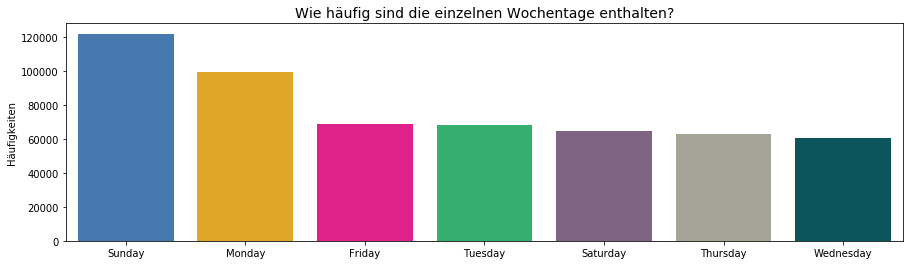

In [37]:
#Oder grafisch
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 4]
fig=sns.barplot(x='Tag', y='Anzahl', data=df_NaDay)
plt.title("Wie häufig sind die einzelnen Wochentage enthalten?", size=14)
plt.xlabel("")
plt.ylabel("Häufigkeiten")
#plt.show()

plt.savefig('Verteilung_Reviews_auf_Tage.png')

### Durch ungleichmäßige Verteilung der Anzahl der Reviews auf die Wochentage, werden die Werte auf Wochenbasis geglättet

In [38]:
df_ = df2.copy()

s_Dates = pd.to_datetime(df_.iloc[:,2], format='%Y-%m-%d', errors='ignore')

#Mit "Nummer" der Woche
df_NuWeek = pd.DataFrame(s_Dates.dt.to_period('W').value_counts(dropna=False))
df_NuWeek = df_NuWeek.reset_index()
df_NuWeek.columns=['#Woche', 'Anzahl']

#Mit "Namen" des Wochentages
df_NaWeek = pd.DataFrame(s_Dates.dt.to_period('W').value_counts(dropna=False))
df_NaWeek = df_NaWeek.reset_index()
df_NaWeek.columns=['Woche', 'Anzahl']

In [39]:
df_NuWeek.sort_values('#Woche')

,#Woche,Anzahl
513,2009-06-15/2009-06-21,1
503,2009-08-17/2009-08-23,1
516,2009-11-23/2009-11-29,1
493,2010-02-15/2010-02-21,3
510,2010-03-29/2010-04-04,1
...,...,...
33,2020-02-17/2020-02-23,3589
5,2020-02-24/2020-03-01,4379
56,2020-03-02/2020-03-08,2961
143,2020-03-09/2020-03-15,1555


In [40]:
df_NaWeek.sort_values('Woche')

,Woche,Anzahl
513,2009-06-15/2009-06-21,1
503,2009-08-17/2009-08-23,1
516,2009-11-23/2009-11-29,1
493,2010-02-15/2010-02-21,3
510,2010-03-29/2010-04-04,1
...,...,...
33,2020-02-17/2020-02-23,3589
5,2020-02-24/2020-03-01,4379
56,2020-03-02/2020-03-08,2961
143,2020-03-09/2020-03-15,1555


In [41]:
df_NaWeek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Woche   518 non-null    period[W-SUN]
 1   Anzahl  518 non-null    int64        
dtypes: int64(1), period[W-SUN](1)
memory usage: 8.2 KB


### Einführung der wöchentlichen Daten

In [42]:
df_TS = df_TS.reset_index()

In [43]:
df_TS

,date,listing_id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,2009-06-20,3176,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
1,2010-11-07,3176,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
2,2010-11-24,3176,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
3,2010-12-21,3176,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
4,2011-01-04,3176,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
...,...,...,...,...,...
545698,2020-03-16,42834377,Friedrichshain,Karl-Marx-Allee-Nord,Friedrichshain-Kreuzberg
545699,2020-03-11,42836274,Westend,Heerstrasse,Charlottenburg-Wilm.
545700,2020-03-16,42850717,Wedding,Brunnenstr. Nord,Mitte
545701,2020-03-12,42852486,Lichtenberg,Alt-Lichtenberg,Lichtenberg


In [44]:
df_NaWeek

,Woche,Anzahl
0,2019-09-09/2019-09-15,5472
1,2019-12-30/2020-01-05,5402
2,2019-09-30/2019-10-06,4890
3,2019-09-23/2019-09-29,4749
4,2019-10-28/2019-11-03,4399
...,...,...
513,2009-06-15/2009-06-21,1
514,2010-10-25/2010-10-31,1
515,2010-11-08/2010-11-14,1
516,2009-11-23/2009-11-29,1


In [45]:
df_TS = df_TS.resample('W', on='date').count()

In [46]:
#Das muss Zeitreihe für Zeitreihe individuell gemacht werden!
#Schritt 0: Auswahl einer Zeitreihe
df_ = df_TS.iloc[:,0:1].copy() #Hier wähle ich den Index (Spalte 0) und die erste Datenspalte (Spalte 1) aus.

# df.iloc[:,[0,4]].copy() #So würde ich bspw. die 4. Datenspalte (Spalte 5) auswählen.

In [47]:
df_.columns = ['Reviews_Count']

In [48]:
df_.reset_index()

,date,Reviews_Count
0,2009-06-21,1
1,2009-06-28,0
2,2009-07-05,0
3,2009-07-12,0
4,2009-07-19,0
...,...,...
557,2020-02-23,3589
558,2020-03-01,4379
559,2020-03-08,2961
560,2020-03-15,1555


In [43]:
#War sinnvoll für tägliche Daten
#df_ = df_.groupby('date').count().reset_index()
#df_.columns = ['Date', 'Reviews_Count']

In [49]:
#Cleansing
#Schritt 1:
l_colnames = df_.columns.to_list()
l_colnames[0] = 'Date'
df_.columns = l_colnames

df_['Date'] = pd.to_datetime(df_['Date'], format='%Y-%m-%d', errors='ignore')
daterange = pd.date_range(start=min(df_['Date']), end=max(df_['Date']), freq='W')
df_ts = pd.DataFrame(daterange)
df_ts.columns = ['Date']
df_ts = df_ts.merge(df_, how='left', on='Date')

#Schritt 2
#print('{} fehlende Werte werden durch den zuletzt gültigen Wert ersetzt.'.format(df_ts.iloc[:,1].isna().sum()))
#df_ts = df_ts.fillna(method='ffill')
#df_ts = df_ts.set_index('Date', drop=True)

In [50]:
df_ts

,Date


In [51]:
df_ts = df_TS

In [52]:
df_ts.columns = ['Date', 'listing_id', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed']

In [53]:
df_ts_p = df_ts.copy()

In [54]:
df_ts_p = df_ts_p.drop(['Date', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'], axis = 1)

In [55]:
df_ts_p.columns = ['Reviews_Count']

In [56]:
df_ts_p

,Reviews_Count
date,
2009-06-21,1
2009-06-28,0
2009-07-05,0
2009-07-12,0
2009-07-19,0
...,...
2020-02-23,3589
2020-03-01,4379
2020-03-08,2961


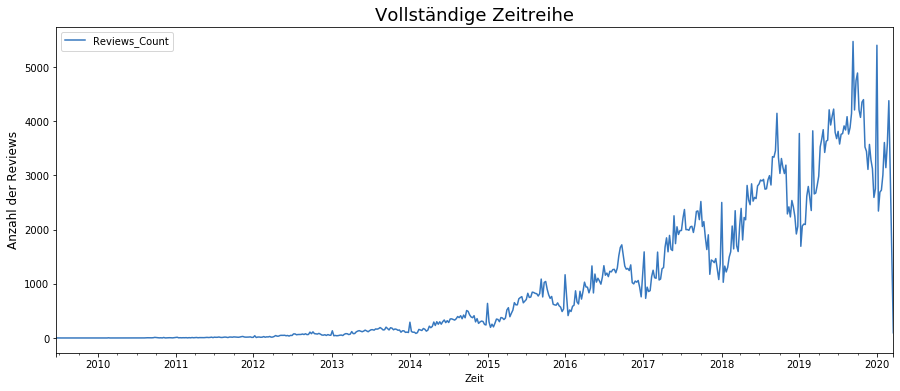

In [57]:
#Plotten der vollständigen Daten
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]
fig = df_ts_p.plot(kind='line')
plt.title('Vollständige Zeitreihe', size=18)
plt.legend(fontsize=12)
plt.ylabel('Anzahl der Reviews', size=12)
plt.legend()
plt.xlabel('Zeit')
#plt.show()


plt.savefig('vollständige_Zeitreihe.png')

In [58]:
df = df_ts.reset_index()

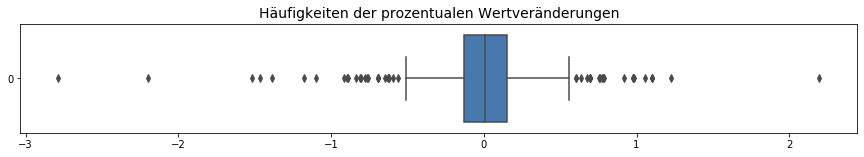

In [59]:
#Ausreißer Anzeigen - Für Zeitreihen NICHT entfernen.
#Ausreißer erkennt man in Zeitreihen an dem Verhalten der prozentualen Veränderungen zum jeweils vorherigen Wert.
%matplotlib inline
df_ = df.iloc[:,0:2].copy()
df_.iloc[:,1] = np.log(df_.iloc[:,1]) #Log-Differenzen sind die prozentualen Veränderungen
df_diff = df_.iloc[:,1].diff()

plt.rcParams['figure.figsize'] = [15, 2]

fig = sns.boxplot(data=df_diff, orient='h')

plt.title('Häufigkeiten der prozentualen Wertveränderungen', size=14)
plt.xlabel('')
plt.show()

In [60]:
df.set_index('date')

,Date,listing_id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
date,,,,,
2009-06-21,1,1,1,1,1
2009-06-28,0,0,0,0,0
2009-07-05,0,0,0,0,0
2009-07-12,0,0,0,0,0
2009-07-19,0,0,0,0,0
...,...,...,...,...,...
2020-02-23,3589,3589,3589,3589,3589
2020-03-01,4379,4379,4379,4379,4379
2020-03-08,2961,2961,2961,2961,2961


In [61]:
df.iloc[:,1:2]

,Date
0,1
1,0
2,0
3,0
4,0
...,...
557,3589
558,4379
559,2961
560,1555


In [62]:
df.Date.max()

5472

In [63]:
df.Date.mean()

971.0017793594307

In [64]:
df

,date,Date,listing_id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,2009-06-21,1,1,1,1,1
1,2009-06-28,0,0,0,0,0
2,2009-07-05,0,0,0,0,0
3,2009-07-12,0,0,0,0,0
4,2009-07-19,0,0,0,0,0
...,...,...,...,...,...,...
557,2020-02-23,3589,3589,3589,3589,3589
558,2020-03-01,4379,4379,4379,4379,4379
559,2020-03-08,2961,2961,2961,2961,2961
560,2020-03-15,1555,1555,1555,1555,1555


In [65]:
df['Date'] = df['Date'].where((df['Date'] != 0), 0.001)

In [66]:
df['Date']

0         1.000
1         0.001
2         0.001
3         0.001
4         0.001
         ...   
557    3589.000
558    4379.000
559    2961.000
560    1555.000
561      96.000
Name: Date, Length: 562, dtype: float64

In [67]:
df.iloc[:,0:2]

,date,Date
0,2009-06-21,1.000
1,2009-06-28,0.001
2,2009-07-05,0.001
3,2009-07-12,0.001
4,2009-07-19,0.001
...,...,...
557,2020-02-23,3589.000
558,2020-03-01,4379.000
559,2020-03-08,2961.000
560,2020-03-15,1555.000


In [68]:
df.columns = ['Date', 'Reviews_Count', 'listing_id', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']

In [69]:
df.iloc[:,1]

0         1.000
1         0.001
2         0.001
3         0.001
4         0.001
         ...   
557    3589.000
558    4379.000
559    2961.000
560    1555.000
561      96.000
Name: Reviews_Count, Length: 562, dtype: float64

In [70]:
i_iqr_faktor = 2
df_ = df.iloc[:,0:2].copy()
df_['Date'] = pd.to_datetime(df_['Date'], format='%Y-%m-%d', errors='ignore')
df_.iloc[:,1:] = np.log(df_.iloc[:,1:])
df_diff = df_.diff()


q25 = df_diff.iloc[:,1].quantile(0.25)
q75 = df_diff.iloc[:,1].quantile(0.75)

iqr = q75-q25

grenze_unten = q25 - (i_iqr_faktor*iqr)
grenze_oben = q75 + (i_iqr_faktor*iqr)
df_[((df_diff.iloc[:,1] < grenze_unten) | (df_diff.iloc[:,1] > grenze_oben))]




df_dates = df_[((df_diff.iloc[:,1] < grenze_unten) | (df_diff.iloc[:,1] > grenze_oben))]
df_dates = df_dates.reset_index()
df_dates = df_dates.iloc[:,0:2]

print('Bei den eingegebenen Daten und des IQR-Faktors sind Wochen, an denen die Wertveränderung < {0:.2f} oder > {1:.2f} war, auffällig.'.format(grenze_unten, grenze_oben))
print('Dies tritt an {} Tagen auf: '.format(len(df_dates)))
df_dates

Bei den eingegebenen Daten und des IQR-Faktors sind Wochen, an denen die Wertveränderung < -0.63 oder > 0.66 war, auffällig.
Dies tritt an 59 Tagen auf: 


,index,Date
0,1,2009-06-28
1,9,2009-08-23
2,10,2009-08-30
3,23,2009-11-29
4,24,2009-12-06
5,35,2010-02-21
6,36,2010-02-28
7,41,2010-04-04
8,42,2010-04-11
9,45,2010-05-02


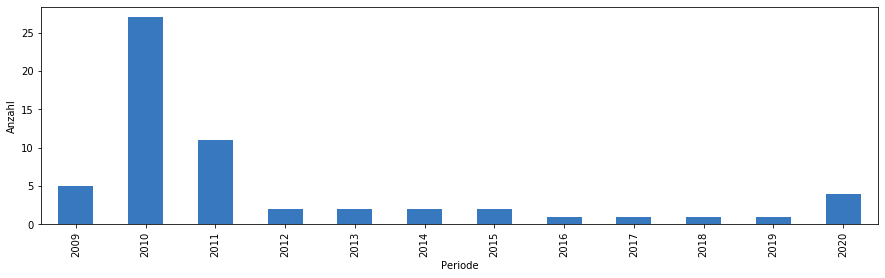

In [71]:
#Sind einzelne Jahre (Monate) besonders auffällig?
%matplotlib inline
df_dates['Jahr'] = df_dates['Date'].map(lambda x: x.strftime('%Y'))
plt.rcParams['figure.figsize'] = [15, 4]
df_dates.groupby('Jahr').size().plot(kind = 'bar')
plt.xlabel('Periode')
plt.ylabel('Anzahl')
plt.show()

In [72]:
df_dates.groupby('Jahr').size()

Jahr
2009     5
2010    27
2011    11
2012     2
2013     2
2014     2
2015     2
2016     1
2017     1
2018     1
2019     1
2020     4
dtype: int64

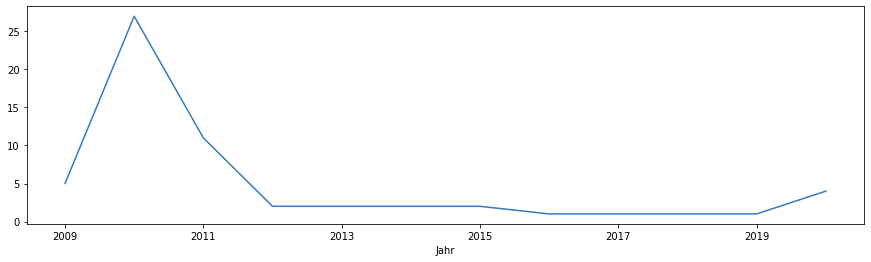

In [73]:
df_dates.groupby('Jahr').size().plot()

In [74]:
#Zu untersuchende Daten auswählen
df_ts_clean = df_ts[(df_ts.index > '2013-12-31') & (df_ts.index < '2020-03-01')]
print('Insgesamt liegen {} zusammenhängende ähnliche Beobachtungen vor.'.format(len(df_ts_clean)))

Insgesamt liegen 321 zusammenhängende ähnliche Beobachtungen vor.


In [75]:
df_ts_clean.columns = ['Reviews_Count', 'listing_id', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']

In [76]:
df_ts_clean = df_ts_clean['Reviews_Count']

In [77]:
df_ts_clean = pd.DataFrame(df_ts_clean)

In [78]:
df_ts_clean

,Reviews_Count
date,
2014-01-05,291
2014-01-12,119
2014-01-19,106
2014-01-26,107
2014-02-02,84
2014-02-09,98
2014-02-16,158
2014-02-23,148
2014-03-02,138


In [79]:
#Zerteilung in Trainings- und Testdaten - Im Normalfall beginnt man mit dem Verhältnis 80:20
#Weil wir Tagesdaten haben und mit "klassischen" Zeitreihenanalyseverfahren schwerlich mehr als 60 Perioden mit hoher
#Genauigkeit schätzen kann, teilen wir 95:5.

i_split = int(0.85*len(df_ts_clean))

df_train, df_test = df_ts_clean.iloc[:i_split,:], df_ts_clean.iloc[i_split:,:]

print('Train und Test sind zusammen {} Einträge lang.'.format(len(df_train)+len(df_test)))
print('D.h., alle Forecasts müssen {} Perioden lang sein.'.format(len(df_test)))

Train und Test sind zusammen 321 Einträge lang.
D.h., alle Forecasts müssen 49 Perioden lang sein.


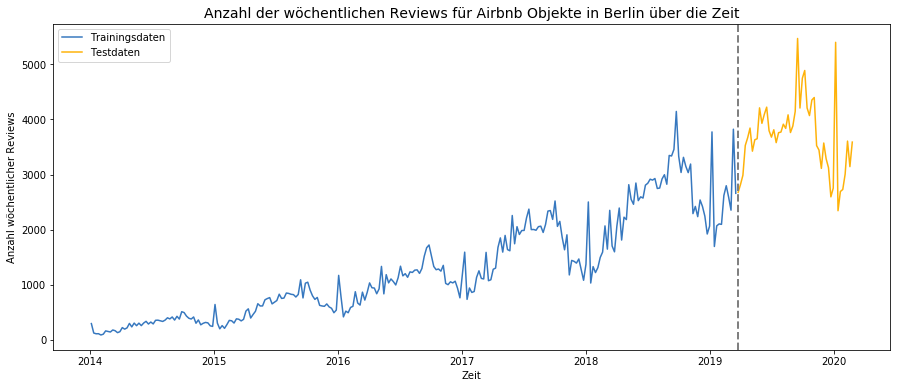

In [80]:
#Plot

plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(df_train.index, df_train.values, label='Trainingsdaten')
plt.plot(df_test.index, df_test.values, label='Testdaten', color=colors[1])

plt.axvline(x = df_ts_clean.index[i_split], linewidth=2, color='grey', ls='--')
plt.legend(loc=2, fontsize=10)
plt.title('Anzahl der wöchentlichen Reviews für Airbnb Objekte in Berlin über die Zeit'.format(df_train.columns[0]), fontsize=14)
plt.xlabel('Zeit', fontsize=10)
plt.ylabel('Anzahl wöchentlicher Reviews', fontsize=10)
#plt.show()

plt.savefig('Einteilung_Training_Test.png')

In [81]:
vals = np.asarray(df_train.values)
y_hat = df_test.copy()
y_hat['naiv'] = vals[-1][0]

In [82]:
df_train.values

array([[ 291],
       [ 119],
       [ 106],
       [ 107],
       [  84],
       [  98],
       [ 158],
       [ 148],
       [ 138],
       [ 175],
       [ 161],
       [ 126],
       [ 144],
       [ 218],
       [ 190],
       [ 213],
       [ 294],
       [ 231],
       [ 300],
       [ 253],
       [ 299],
       [ 254],
       [ 301],
       [ 332],
       [ 283],
       [ 319],
       [ 285],
       [ 351],
       [ 353],
       [ 341],
       [ 330],
       [ 354],
       [ 396],
       [ 376],
       [ 411],
       [ 355],
       [ 423],
       [ 373],
       [ 507],
       [ 491],
       [ 427],
       [ 388],
       [ 374],
       [ 411],
       [ 297],
       [ 357],
       [ 269],
       [ 296],
       [ 312],
       [ 304],
       [ 250],
       [ 240],
       [ 638],
       [ 299],
       [ 196],
       [ 254],
       [ 205],
       [ 273],
       [ 349],
       [ 342],
       [ 301],
       [ 377],
       [ 370],
       [ 340],
       [ 368],
       [ 518],
       [ 5

In [83]:
y_hat

,Reviews_Count,naiv
date,,
2019-03-24,2675,2658
2019-03-31,2820,2658
2019-04-07,2986,2658
2019-04-14,3528,2658
2019-04-21,3667,2658
2019-04-28,3844,2658
2019-05-05,3424,2658
2019-05-12,3631,2658
2019-05-19,3650,2658


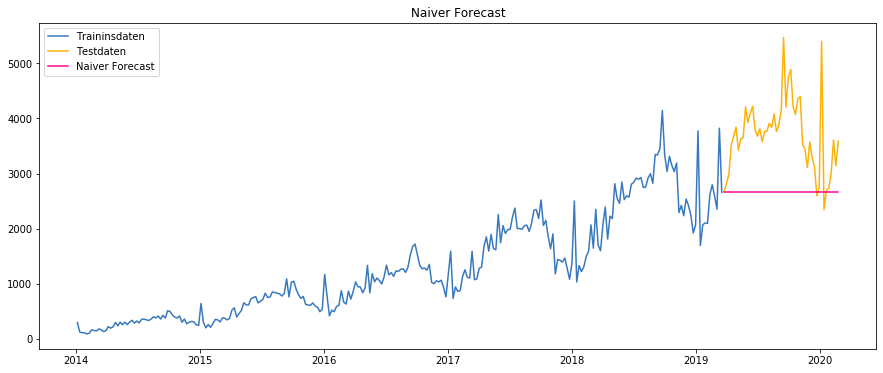

In [84]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(df_train.index, df_train.values, label='Traininsdaten')
plt.plot(df_test.index, df_test.values, label='Testdaten')
plt.plot(y_hat.index, y_hat['naiv'], label='Naiver Forecast')
plt.legend(loc='best')
plt.title("Naiver Forecast")
plt.show()

In [85]:
#Importieren der Fehler-Schätzstatistiken aus sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt #Importieren einer Wurzel-Funktion aus math

### Root Mean Squared Error - RMSE
<font size="4">
Tipp: https://en.wikipedia.org/wiki/Root-mean-square_deviation <br>


\begin{align}
\text{RMSE} \; &= \sqrt{\frac{\sum_{t=1}^T (\hat{y}_t - y_t)^2}{T}} 
\end{align} <br>

Seltener schaut man auch einfach auch den durchschnittlichen Fehler.<br>

\begin{align*}
\text{ME} \; &= \frac{\sum_{t=1}^T (\hat{y}_t - y_t)}{T}
\end{align*} <br>

</font>

In [86]:
df_test

,Reviews_Count
date,
2019-03-24,2675
2019-03-31,2820
2019-04-07,2986
2019-04-14,3528
2019-04-21,3667
2019-04-28,3844
2019-05-05,3424
2019-05-12,3631
2019-05-19,3650


In [87]:
rmse = sqrt(mean_squared_error(df_test, y_hat.naiv))
me = (df_test.iloc[:,0] - y_hat['naiv']).sum() / len(df_test)
print('Für den naiven Forecast ergeben sich ein ME: {0:.4f} und ein RMSE: {1:.4f}.'.format(me,rmse))

Für den naiven Forecast ergeben sich ein ME: 1035.4082 und ein RMSE: 1229.3890.


In [88]:
# RMSE = 0 -> a perfect fit

<font size=4>
Auch kann man die Güte es Forecasts an bestimmten Eigenschaften der Residuen (Schätzfehler) ablesen.<br>

\begin{align*}
\text{Residuen} \; &= \hat{y}_t - y_t \quad = \epsilon_t
\end{align*}

</font>

In [89]:
residuen = (df_test.iloc[:,0] - y_hat['naiv'])
print('Die Residuen haben für diesen Forecast folgene Standardabweichung: {0:.4f}.'.format(residuen.std()))
stdres = residuen.std()

Die Residuen haben für diesen Forecast folgene Standardabweichung: 669.6865.


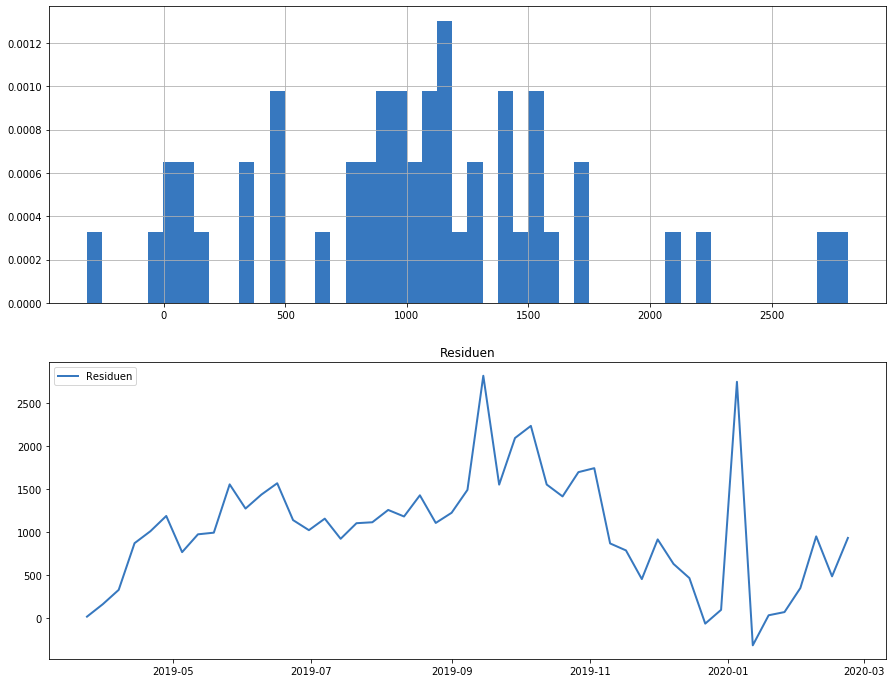

In [90]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]
plt.subplot(2,1,1)
residuen.hist(bins=50, density=True)
plt.subplot(2,1,2)
plt.plot(df_test.index, residuen.values, label='Residuen', linewidth=2)
plt.legend(loc=2)
plt.title("Residuen")
plt.show()

In [91]:
#Anlegen einer Tabelle, um später die Güte verschiedener Verfahren miteinander vergleichen zu können.
#ACHTUNG: Mit dieser Zeile wird ein leerer DataFrame erzeugt.
df_Fehler = pd.DataFrame(columns=['Methode', 'ME', 'RMSE', 'StdRes'])

In [92]:
#Einfügen der Güte-Maße
df_Fehler = df_Fehler.append({'Methode': 'Naives Fortschreiben', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

In [93]:
df_Fehler

,Methode,ME,RMSE,StdRes
0,Naives Fortschreiben,1035.408163,1229.389039,669.686491


### Moving Average (Gleitender Mittelwert)

In [94]:
#Mit rolling und mean() kann man den gleitenden Mittelwert ganz einfach erzeugen. 
#Mit einer Schleife und append schreibt man die Werte fort.

n = 60 #Bspw. den gleitenden Durchschnitt über alle Tage des letzten Quartals.
df_train.rolling(n).mean().iloc[-1][0]

2544.0

In [95]:
n = 60
df_mav = df_train.copy()
for i in range(len(df_test)):
    df_mav = df_mav.append({df_mav.columns[0] : df_mav.rolling(n).mean().iloc[-1][0]}, ignore_index=True)

In [96]:
y_hat = df_test.copy()
y_hat_mav = df_mav.iloc[-len(df_test):].copy()
y_hat['mav'] = y_hat_mav.values

In [97]:
y_hat_mav

,Reviews_Count
272,2544.000000
273,2566.100000
274,2587.085000
275,2605.319750
276,2622.241746
277,2631.512442
278,2647.970982
279,2652.953832
280,2668.819729
281,2686.716725


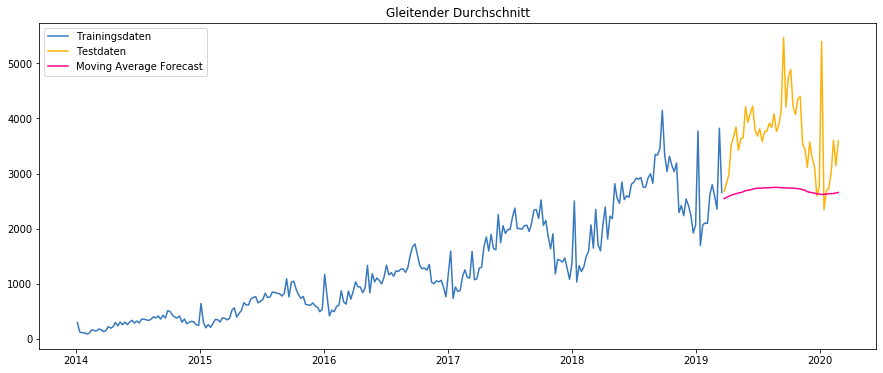

In [98]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(df_train.index, df_train.values, label='Trainingsdaten')
plt.plot(df_test.index, df_test.values, label='Testdaten')
plt.plot(df_test.index, y_hat['mav'].values, label='Moving Average Forecast')

plt.title('Gleitender Durchschnitt')
plt.legend(loc='best')
plt.show()

#plt.savefig('Moving_Average.png')

In [99]:
rmse = sqrt(mean_squared_error(df_test, y_hat.mav))
me = (df_test.iloc[:,0] - y_hat['mav']).sum() / len(df_test)
print('Für den naiven Forecast ergeben sich ein ME: {0:.4f} und ein RMSE: {1:.4f}.'.format(me,rmse))

residuen = (df_test.iloc[:,0] - y_hat['mav'])
print('Die Residuen haben für diesen Forecast folgene Standardabweichung: {0:.4f}.'.format(residuen.std()))
stdres = residuen.std()

Für den naiven Forecast ergeben sich ein ME: 1011.3126 und ein RMSE: 1191.8448.
Die Residuen haben für diesen Forecast folgene Standardabweichung: 637.2026.


In [100]:
df_Fehler = df_Fehler.append({'Methode': 'Moving Average', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

In [101]:
df_Fehler

,Methode,ME,RMSE,StdRes
0,Naives Fortschreiben,1035.408163,1229.389039,669.686491
1,Moving Average,1011.312575,1191.844782,637.202579


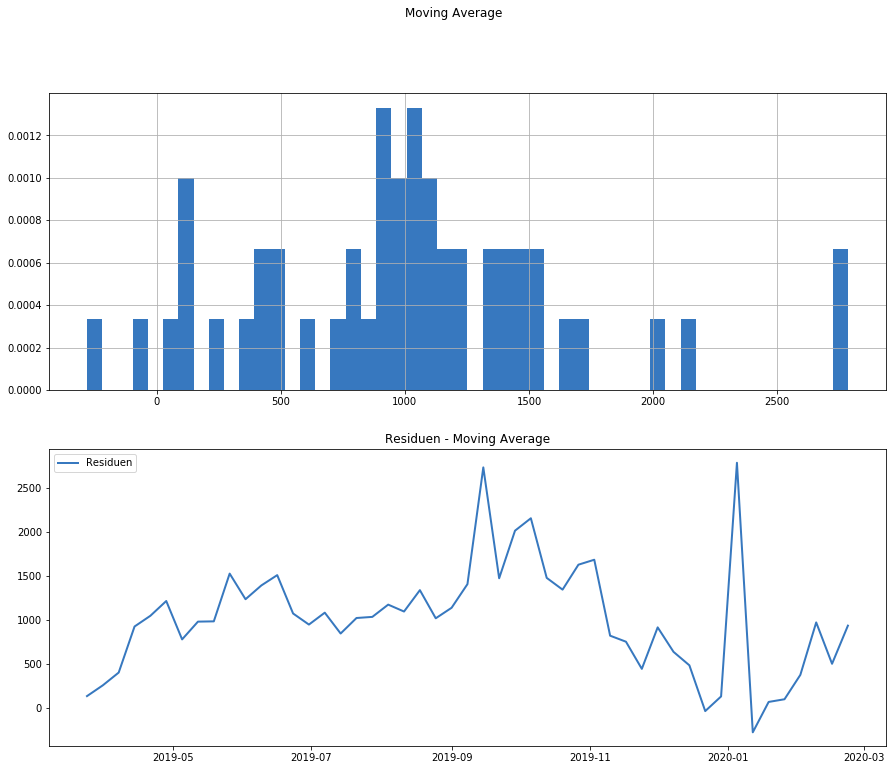

In [102]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]
plt.suptitle('Moving Average')
plt.subplot(2,1,1)
residuen.hist(bins=50, density=True)
plt.subplot(2,1,2)
plt.plot(df_test.index, residuen.values, label='Residuen', linewidth=2)
plt.legend(loc=2)
plt.title("Residuen - Moving Average")
plt.show()

<h3>Einfache (naive) exponentielle Glättung </h3><br>
<font size=4>
Für die einfache exponentielle Glättung gilt: <br><br>
\begin{align}
\hat{y}_{t+1} &= \hat{y}_{t} + \alpha ( y_t - \hat{y}_{t}) 
\end{align} <br>

Weil $\alpha$ zwischen 0 und 1 liegen muss, kann man die Gleichung umschreiben: <br><br>
\begin{align}
\hat{y}_{t+1} &= \alpha y_t + (1-\alpha) \hat{y}_{t} 
\end{align} <br>

Und das lässt sich schreiben als: <br><br>
\begin{align}
\hat{y}_{t+1} &= \alpha y_{t} + \alpha(1-\alpha) y_{t-1} + \alpha(1-\alpha)^2 y_{t-2} + \cdots + \alpha(1-\alpha)^{t-1} y_{1} + \alpha(1-\alpha)^{t} \hat{y}_{1} 
\end{align} <br>
</font>

In [105]:
#Forecasts mit verschiedenen Glättungsparametern erzeugen
fit1 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.25,optimized=False)
fcast1 = fit1.forecast(len(df_test)).rename(r'$\alpha=0.25$')


fit2 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.50,optimized=False)
fcast2 = fit2.forecast(len(df_test)).rename(r'$\alpha=0.50$')


fit3 = SimpleExpSmoothing(df_train).fit()
fcast3 = fit3.forecast(len(df_test)).rename(r'$\alpha=%s$'%round(fit3.model.params['smoothing_level'],1))

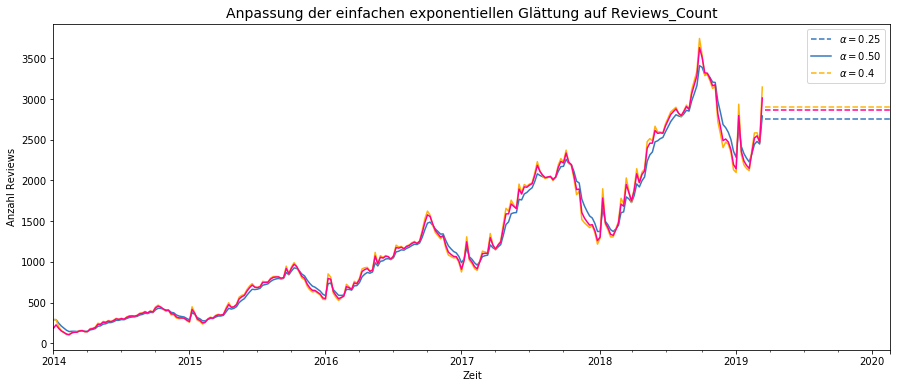

In [106]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

fcast1.plot(legend=True, color=colors[0], ls='--')
fit1.fittedvalues.plot(color=colors[0])

fcast2.plot(legend=True, color=colors[1], ls='--')
fit2.fittedvalues.plot(color=colors[1])

fcast3.plot(legend=True, color=colors[2], ls='--')
fit3.fittedvalues.plot(color=colors[2])

plt.title('Anpassung der einfachen exponentiellen Glättung auf {}'.format(df_train.columns[0]), fontsize=14)
plt.xlabel('Zeit', fontsize=10)
plt.ylabel('Anzahl Reviews', fontsize=10)

plt.show()

In [107]:
fit3.params

{'smoothing_level': 0.40065627340183385,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 184.25945023087016,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
rmse = sqrt(mean_squared_error(df_test, fcast1.values))
me = (df_test.iloc[:,0] - fcast1.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast1.values)
stdres = residuen.std()
print('Forecast 1 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

Forecast 1 - RMSE: 1146.4611, ME: 935.4388, StdRes: 669.6865


In [109]:
df_Fehler = df_Fehler.append({'Methode': 'EinfExpGlätt 0.25', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

In [110]:
rmse = sqrt(mean_squared_error(df_test, fcast2.values))
me = (df_test.iloc[:,0] - fcast2.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast2.values)
stdres = residuen.std()
print('Forecast 2 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

Forecast 2 - RMSE: 1032.3640, ME: 791.4847, StdRes: 669.6865


In [111]:
df_Fehler = df_Fehler.append({'Methode': 'EinfExpGlätt 0.5', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

In [112]:
rmse = sqrt(mean_squared_error(df_test, fcast3.values))
me = (df_test.iloc[:,0] - fcast3.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast3.values)
stdres = residuen.std()
print('Forecast 3 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

Forecast 3 - RMSE: 1057.0688, ME: 823.4483, StdRes: 669.6865


In [113]:
df_Fehler = df_Fehler.append({'Methode': 'EinfExpGlätt 1', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

In [114]:
df_Fehler

,Methode,ME,RMSE,StdRes
0,Naives Fortschreiben,1035.408163,1229.389039,669.686491
1,Moving Average,1011.312575,1191.844782,637.202579
2,EinfExpGlätt 0.25,935.438756,1146.461081,669.686491
3,EinfExpGlätt 0.5,791.484731,1032.363997,669.686491
4,EinfExpGlätt 1,823.448279,1057.068783,669.686491


<h3>Exponentielle Glättung mit 'Level' und 'Trend' (Holt-Verfahren)</h3><br>
<font size=4>
Das Holt-Verfahren nennt man auch zweifache exponentielle Glättung:<br><br>

\begin{align*}
\text{Level: } \; \quad \ell_t &= \alpha y_t + (1-\alpha) (\ell_{t-1} + b_{t-1}) \\ \\
\text{Growth: } \; \quad b_t &= \beta^* (\ell_t - \ell_{t-1}) + (1-\beta^*) b_{t-1} \\ \\
\text{Forecast: } \; \hat{y}_{t+h|t} &= \ell_t + b_t h \\ \\
\end{align*}

Manchmal wird der Trend auch gedämpft. <br><br>

\begin{align*}
\text{Level: } \; \quad \ell_t &= \alpha y_t + (1-\alpha) (\ell_{t-1} + \phi b_{t-1}) \\ \\
\text{Growth: } \; \quad b_t &= \beta^* (\ell_t - \ell_{t-1}) + (1-\beta^*) b_{t-1} \\ \\
\text{Forecast: } \; \hat{y}_{t+h|t} &= \ell_t + (\phi + \phi^2 + \cdots + \phi^h) b_t h \\ \\
\end{align*}
</font>

In [115]:
#Schätzen der zweifachen exponentiellen Glättung
fit4 = Holt(df_train.iloc[:,0]).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast4 = fit4.forecast(len(df_test)).rename("Holt's linear trend")

fit5 = Holt(df_train.iloc[:,0], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast5 = fit5.forecast(len(df_test)).rename("Exponential trend")

fit6 = Holt(df_train.iloc[:,0], damped=True).fit()
fcast6 = fit6.forecast(len(df_test)).rename("Additive damped trend")

In [116]:
fit6.params

{'smoothing_level': 0.28977684741329757,
 'smoothing_slope': 0.2897768452141713,
 'smoothing_seasonal': nan,
 'damping_slope': 0.7694261339350378,
 'initial_level': 262.5854976890683,
 'initial_slope': 0.008944653840315396,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

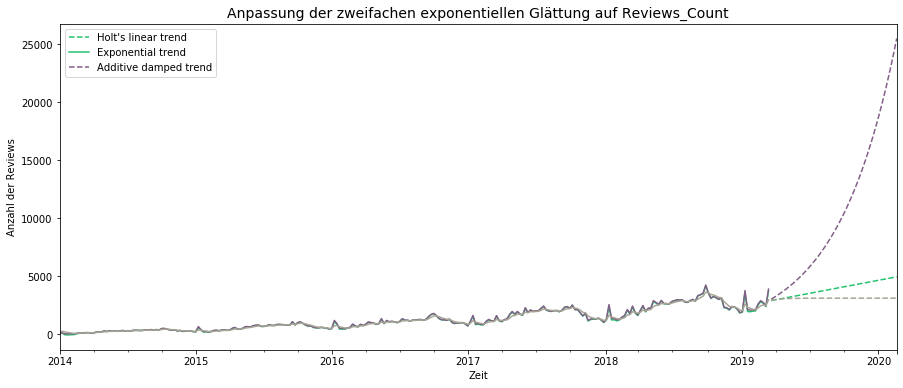

In [117]:
#Plotten der Ergebnisse

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

fcast4.plot(legend=True, color=colors[3], ls='--')
fit4.fittedvalues.plot(color=colors[3])

fcast5.plot(legend=True, color=colors[4], ls='--')
fit5.fittedvalues.plot(color=colors[4])

fcast6.plot(legend=True, color=colors[5], ls='--')
fit6.fittedvalues.plot(color=colors[5])

plt.title('Anpassung der zweifachen exponentiellen Glättung auf {}'.format(df_train.columns[0]), fontsize=14)
plt.xlabel('Zeit', fontsize=10)
plt.ylabel('Anzahl der Reviews', fontsize=10)

plt.show()

In [118]:
rmse = sqrt(mean_squared_error(df_test, fcast4.values))
me = (df_test.iloc[:,0] - fcast4.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast4.values)
stdres = residuen.std()
print('Forecast 4 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

df_Fehler = df_Fehler.append({'Methode': 'Holt LT', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

rmse = sqrt(mean_squared_error(df_test, fcast5.values))
me = (df_test.iloc[:,0] - fcast5.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast5.values)
stdres = residuen.std()
print('Forecast 5 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

df_Fehler = df_Fehler.append({'Methode': 'Holt ET', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

rmse = sqrt(mean_squared_error(df_test, fcast6.values))
me = (df_test.iloc[:,0] - fcast6.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast6.values)
stdres = residuen.std()
print('Forecast 6 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

df_Fehler = df_Fehler.append({'Methode': 'Holt add, damped trend', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

Forecast 4 - RMSE: 981.8091, ME: -251.4082, StdRes: 958.9100
Forecast 5 - RMSE: 9605.0868, ME: -6949.7482, StdRes: 6698.8431
Forecast 6 - RMSE: 872.5104, ME: 579.7888, StdRes: 658.7685


In [119]:
df_Fehler

,Methode,ME,RMSE,StdRes
0,Naives Fortschreiben,1035.408163,1229.389039,669.686491
1,Moving Average,1011.312575,1191.844782,637.202579
2,EinfExpGlätt 0.25,935.438756,1146.461081,669.686491
3,EinfExpGlätt 0.5,791.484731,1032.363997,669.686491
4,EinfExpGlätt 1,823.448279,1057.068783,669.686491
5,Holt LT,-251.408168,981.809067,958.910036
6,Holt ET,-6949.748168,9605.086804,6698.843111
7,"Holt add, damped trend",579.788843,872.510385,658.768488


<h3>Exponentielle Glättung mit 'Level', 'Trend' und 'Saisoneffekten' (Holt-Winters)</h3><br>
<font size=4>
Das Holt-Winters-Verfahren nennt man (spezielle) dreifache exponentielle Glättung:<br><br>

\begin{align*}
\text{Level: } \; \quad \ell_t &= \alpha \frac{y_t}{s_{t-m}} + (1-\alpha) (\ell_{t-1} + b_{t-1}) \\\\
\text{Growth: } \; \quad b_t &= \beta^* (\ell_t - \ell_{t-1}) + (1-\beta^*) b_{t-1} \\\\
\text{Seasonal: } \; \quad s_t &= \gamma \frac{y_t}{\ell_{t-1} + b_{t-1}} + (1-\gamma) s_{t-m} \\\\
\text{Forecast: }\; \hat{y}_{t+h|t} &= (\ell_t + b_t h ) s_{t-m+h_m^+} \\
\end{align*}
</font>

In [120]:
len(df_test)

49

In [121]:
len(df_train)

272

In [122]:
#seasonal_periods = 2 weil Sommer und Winter Trends berücksichtigt werden sollen
#Schätzen von Holt-Winters
fit7 = ExponentialSmoothing(df_train.iloc[:,0], seasonal_periods=52, trend='add', seasonal='add').fit()
fcast7 = fit7.forecast(len(df_test)).rename("Holt-Winters Additive")

fit8 = ExponentialSmoothing(df_train.iloc[:,0], seasonal_periods=52, trend='add', seasonal='mul').fit()
fcast8 = fit8.forecast(len(df_test)).rename("Holt-Winters Multiplikativ")

C:\Users\Yusuf Konyalicetin\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


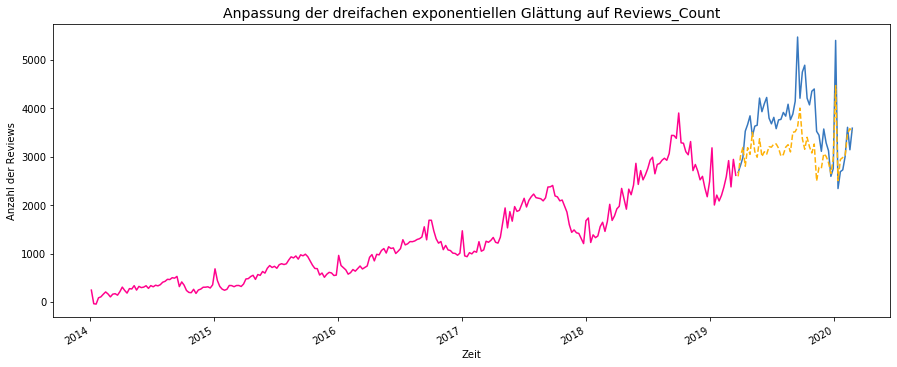

In [129]:
#Plotten der Ergebnisse

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(df_test.index, df_test.values, label='Testdaten')
fcast7.plot(legend=False, color=colors[1], ls='--')
fit7.fittedvalues.plot(color=colors[2])

#fcast8.plot(legend=True, color=colors[3], ls='--')
#fit8.fittedvalues.plot(color=colors[4])

plt.title('Anpassung der dreifachen exponentiellen Glättung auf {}'.format(df_train.columns[0]), fontsize=14)
plt.xlabel('Zeit', fontsize=10)
plt.ylabel('Anzahl der Reviews', fontsize=10)

#plt.show()

plt.savefig('Anpassung_dreifache_exponetielle_Glättung.png')

NameError: name 'data' is not defined

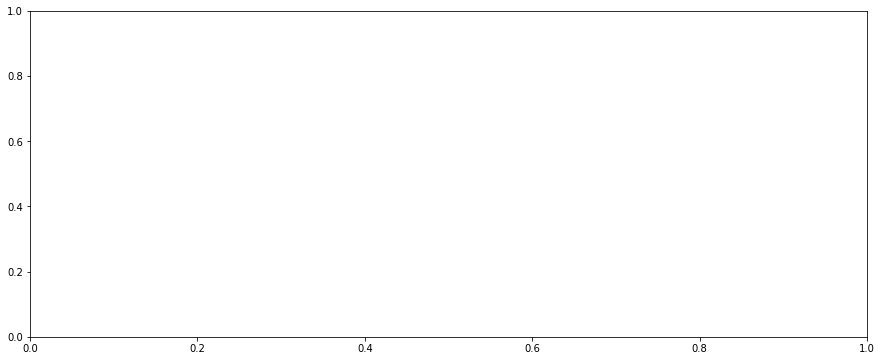

In [127]:

fig, ax = plt.subplots()
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])

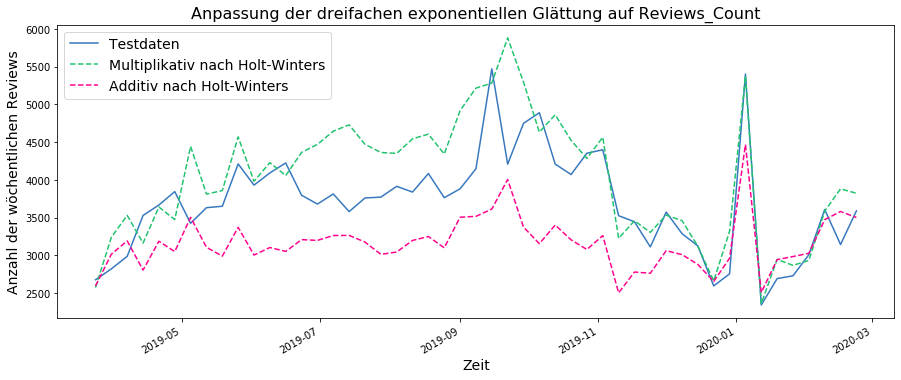

In [128]:
#Plotten der Ergebnisse

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

#fcast7.plot(legend=True, color=colors[1], ls='--')
#fit7.fittedvalues.plot(color=colors[2])

plt.plot(df_test.index, df_test.values, label='Testdaten')
fcast8.plot(legend=True, color=colors[3], ls='--')
#fit8.fittedvalues.plot(color=colors[4])
fcast7.plot(legend=True, color=colors[2], ls='--')
plt.legend(['Testdaten', 'Multiplikativ nach Holt-Winters', 'Additiv nach Holt-Winters'], loc = 'best', fontsize=14)

plt.title('Anpassung der dreifachen exponentiellen Glättung auf {}'.format(df_train.columns[0]), fontsize=16)
plt.xlabel('Zeit', fontsize=14)
plt.ylabel('Anzahl der wöchentlichen Reviews', fontsize=14)

#plt.show()

plt.savefig('Holt_Winters_prognose.png')

In [130]:
rmse = sqrt(mean_squared_error(df_test, fcast7.values))
me = (df_test.iloc[:,0] - fcast7.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast7.values)
stdres = residuen.std()
print('Forecast 7 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

df_Fehler = df_Fehler.append({'Methode': 'Holt Winters add', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

rmse = sqrt(mean_squared_error(df_test, fcast8.values))
me = (df_test.iloc[:,0] - fcast8.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast8.values)
stdres = residuen.std()
print('Forecast 8 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

df_Fehler = df_Fehler.append({'Methode': 'Holt Winters mult', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

Forecast 7 - RMSE: 740.8160, ME: 532.9823, StdRes: 519.8592
Forecast 8 - RMSE: 542.6333, ME: -322.0440, StdRes: 441.2621


In [131]:
df_Fehler

,Methode,ME,RMSE,StdRes
0,Naives Fortschreiben,1035.408163,1229.389039,669.686491
1,Moving Average,1011.312575,1191.844782,637.202579
2,EinfExpGlätt 0.25,935.438756,1146.461081,669.686491
3,EinfExpGlätt 0.5,791.484731,1032.363997,669.686491
4,EinfExpGlätt 1,823.448279,1057.068783,669.686491
5,Holt LT,-251.408168,981.809067,958.910036
6,Holt ET,-6949.748168,9605.086804,6698.843111
7,"Holt add, damped trend",579.788843,872.510385,658.768488
8,Holt Winters add,532.982260,740.815953,519.859179
9,Holt Winters mult,-322.044029,542.633313,441.262139


## Faktor-Dekomposition
### Wie bekomme ich heraus, ob und welche Saisonalität in den Daten vorliegt?

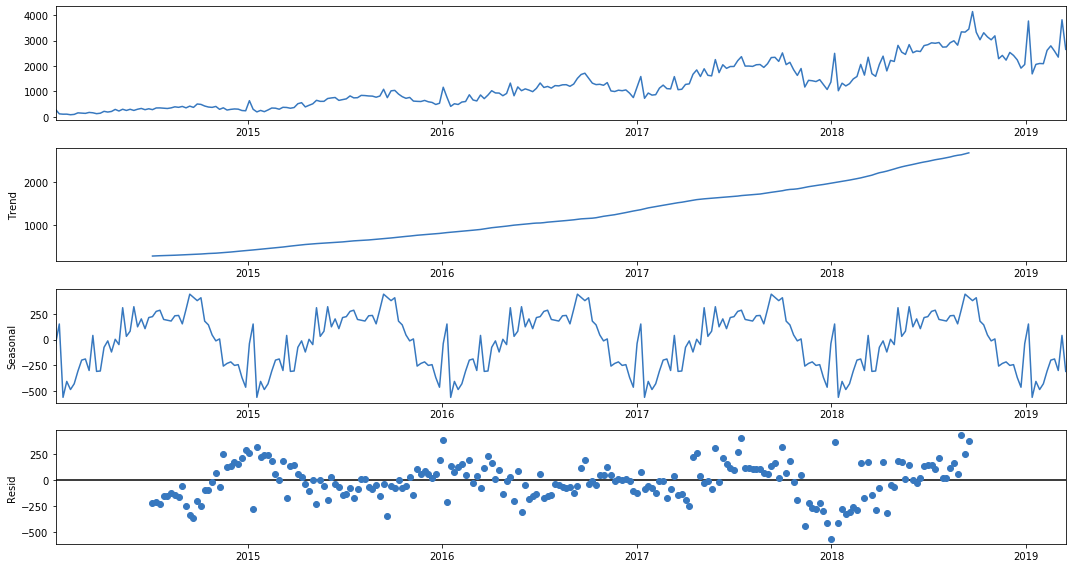

In [132]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
sm.tsa.seasonal_decompose(df_train).plot()
#plt.show()

plt.savefig('Faktor_Dekomp.png')

## Autoregressive Prozesse AR, ARMA und ARIMA

<font size=4>
Tipp: Eine Einführung in ARIMA-Modelle findet sich hier:<br>

https://towardsdatascience.com/unboxing-arima-models-1dc09d2746f8

</font>

<h3>Autoregressive Prognose-Modelle</h3><br>
<font size=4>
Bei ARIMA-Modellen wird eine Zeitreihe durch einen verzögerten Term der zu erklärenden Variable (AR) und einen Moving-Average-Term (MA) erklärt. Unter bestimmten Umständen muss das Modell insgesamt als integrierte Gleichung (I; ein- oder mehrfach differenziert) optimiert werden.<br><br>
Dafür gilt es, die optimale Anzahl an Verzögerungen (p), das optimale Momentum (q) und, ggf., das optimale Differenz-Niveau (d) gefunden werden.<br>

\begin{align*}
\text{Forecast:} \; \quad \hat{y}_{t} &= \mu + \phi_{1}y{t-1}+\cdots+\phi_{p}y_{t-p}-\theta_{1}\epsilon_{t-1}-\cdots-\theta_{q}\epsilon_{t-q} \\\\
\text{Für d = 0:} \; \quad y_t &= Y_t \\\\
\text{Für d = 1:} \; \quad y_t &= Y_t - Y_{t-1} \\\\
\text{Für d = 2:} \; \quad y_t &= (Y_t - Y_{t-1})-(Y_{t-1} - Y_{t-2})
\end{align*}
</font>

In [133]:
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [134]:
#Eigene Auto-Arima-Funktion
#Erzeugen einer Liste von allen Parametern, die getestet werden sollen.
p = range(0, 6)
d = range(0, 3)
q = range(0, 5)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 2, 0),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3),
 (5, 0, 4),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5,

In [135]:
ts = df_train.copy()

In [136]:
AIC = []
ARIMA_model = []
i = 0

for param in pdq:
    try:
        mod = ARIMA(ts, order=param)
        results = mod.fit()
        print() 
        print(i, ": ",'ARIMA{} - AIC:{}'.format(param, results.aic), end='\r')
        AIC.append(results.aic)
        ARIMA_model.append([param])
    except:
        continue
        i = i + 1


0 :  ARIMA(0, 0, 0) - AIC:4480.649834848582
0 :  ARIMA(0, 0, 1) - AIC:4242.449384981884
0 :  ARIMA(0, 0, 2) - AIC:4151.39806247327
0 :  ARIMA(0, 0, 3) - AIC:4047.201453004778
0 :  ARIMA(0, 0, 4) - AIC:4039.459121145724
0 :  ARIMA(0, 1, 0) - AIC:3904.6199242060734
0 :  ARIMA(0, 1, 1) - AIC:3809.0416942848738
0 :  ARIMA(0, 1, 2) - AIC:3808.336035958788
0 :  ARIMA(0, 1, 3) - AIC:3807.05731163945
0 :  ARIMA(0, 1, 4) - AIC:3809.050318183585
0 :  ARIMA(0, 2, 0) - AIC:4177.105618839403
0 :  ARIMA(0, 2, 1) - AIC:3898.809397517345
0 :  ARIMA(0, 2, 2) - AIC:3805.2014147682858
0 :  ARIMA(0, 2, 3) - AIC:3804.3139566208947
0 :  ARIMA(0, 2, 4) - AIC:3802.847575596656
0 :  ARIMA(1, 0, 0) - AIC:3915.246771325417
0 :  ARIMA(1, 0, 1) - AIC:3829.8240283488644
0 :  ARIMA(1, 0, 2) - AIC:3828.869167898796
0 :  ARIMA(1, 0, 3) - AIC:3827.08588553256
0 :  ARIMA(1, 0, 4) - AIC:3829.0490905074203
0 :  ARIMA(1, 1, 0) - AIC:3836.3872439742377
0 :  ARIMA(1, 1, 1) - AIC:3809.0909474790574
0 :  ARIMA(1, 1, 2) - AIC:

In [137]:
print('Das AIC nimmt mit {} für das Modell ARIMA{} den kleinsten Wert an.'.format(min(AIC), ARIMA_model[AIC.index(min(AIC))][0]))

Das AIC nimmt mit 3788.741101485451 für das Modell ARIMA(4, 2, 4) den kleinsten Wert an.


In [138]:
mod = ARIMA(ts,order=ARIMA_model[AIC.index(min(AIC))][0])
fit9 = mod.fit()

In [139]:
#Achtung, wenn d != 0, dann werden Differenzen vorhergesagt.
fcast9 = fit9.predict(start=len(ts), end=len(ts)+len(df_test)-1, dynamic=False)
fcast9.head()

2019-03-24    1535.186795
2019-03-31    -424.358501
2019-04-07     170.034732
2019-04-14    -186.767330
2019-04-21      87.777268
Freq: W-SUN, dtype: float64

In [140]:
y_hat_ = fcast9.copy()
y_hat_[0] = y_hat_[0] + ts.iloc[-1][0]
y_hat_ = np.cumsum(y_hat_.values)
fcast9[:] = y_hat_

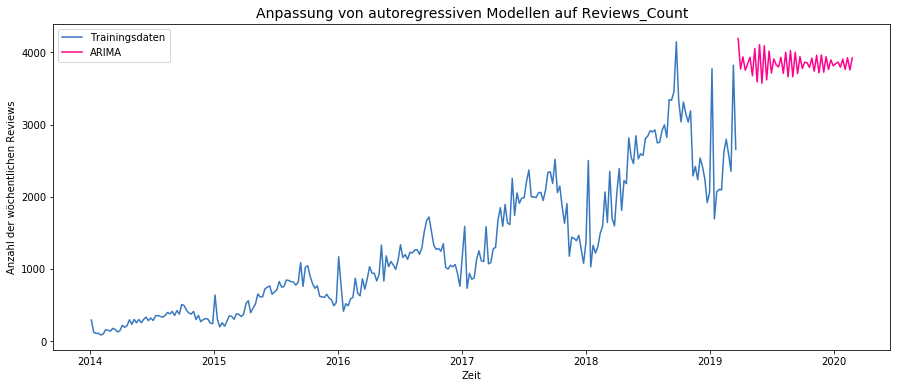

In [141]:
#Plotten der Ergebnisse

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(df_train.index, df_train.values, label='Trainingsdaten')
plt.plot(fcast9.index, fcast9.values, label='ARIMA', color=colors[2])

plt.legend(loc=2)
plt.title('Anpassung von autoregressiven Modellen auf {}'.format(df_train.columns[0]), fontsize=14)
plt.xlabel('Zeit', fontsize=10)
plt.ylabel('Anzahl der wöchentlichen Reviews', fontsize=10)

plt.show()

In [142]:
rmse = sqrt(mean_squared_error(df_test, fcast9.values))
me = (df_test.iloc[:,0] - fcast9.values).sum() / len(df_test)
residuen = (df_test.iloc[:,0] - fcast9.values)
stdres = residuen.std()
print('Forecast 7 - RMSE: {0:.4f}, ME: {1:.4f}, StdRes: {2:.4f}'.format(rmse, me, stdres))

df_Fehler = df_Fehler.append({'Methode': 'ARIMA(2,2,4)', 'ME': me, 'RMSE': rmse, 'StdRes': stdres},
ignore_index=True)

Forecast 7 - RMSE: 709.8760, ME: -154.7082, StdRes: 699.9922


In [143]:
df_Fehler

,Methode,ME,RMSE,StdRes
0,Naives Fortschreiben,1035.408163,1229.389039,669.686491
1,Moving Average,1011.312575,1191.844782,637.202579
2,EinfExpGlätt 0.25,935.438756,1146.461081,669.686491
3,EinfExpGlätt 0.5,791.484731,1032.363997,669.686491
4,EinfExpGlätt 1,823.448279,1057.068783,669.686491
5,Holt LT,-251.408168,981.809067,958.910036
6,Holt ET,-6949.748168,9605.086804,6698.843111
7,"Holt add, damped trend",579.788843,872.510385,658.768488
8,Holt Winters add,532.982260,740.815953,519.859179
9,Holt Winters mult,-322.044029,542.633313,441.262139


### Analyse nach Bezirken

In [144]:
df2.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_dep

In [145]:
# Erstellen des Datensatzes df_Bezirke
df_Bezirke = df2[['listing_id', 'neighbourhood', 'date']]

In [146]:
df_Bezirke

,listing_id,neighbourhood,date
0,3176,Prenzlauer Berg,2009-06-20
1,3176,Prenzlauer Berg,2010-11-07
2,3176,Prenzlauer Berg,2010-11-24
3,3176,Prenzlauer Berg,2010-12-21
4,3176,Prenzlauer Berg,2011-01-04
...,...,...,...
545698,42834377,Friedrichshain,2020-03-16
545699,42836274,Westend,2020-03-11
545700,42850717,Wedding,2020-03-16
545701,42852486,Lichtenberg,2020-03-12


In [147]:
df_Bezirke = df_Bezirke.groupby(['neighbourhood', 'date']).count()

In [148]:
df_Bezirke.sort_values('date')

listing_id
neighbourhood   date                  
Prenzlauer Berg 2009-06-20           1
                2009-08-18           1
                2009-11-25           1
Friedrichshain  2010-02-15           1
Neukölln        2010-02-18           1
...                                ...
Buckow          2020-03-17           1
Friedrichshain  2020-03-17           1
Gropiusstadt    2020-03-17           1
Wilmersdorf     2020-03-17           1
Charlottenburg  2020-03-17           3

[70306 rows x 1 columns]

In [149]:
df_Bezirke = df_Bezirke.reset_index()

In [150]:
df_Bezirke = df_Bezirke.pivot_table('listing_id', 'date', 'neighbourhood')

In [151]:
df_Bezirke.sum().sort_values(ascending=False)[:10]

neighbourhood
Prenzlauer Berg    85276.0
Mitte              84793.0
Kreuzberg          67248.0
Friedrichshain     56797.0
Neukölln           56354.0
Schöneberg         28046.0
Wedding            24446.0
Charlottenburg     23757.0
Moabit             21976.0
Wilmersdorf        10109.0
dtype: float64

In [152]:
top_10 = df_Bezirke.sum().sort_values(ascending=False)[:10].index
top_5 = df_Bezirke.sum().sort_values(ascending=False)[:5].index

In [153]:
top_10

Index(['Prenzlauer Berg', 'Mitte', 'Kreuzberg', 'Friedrichshain', 'Neukölln',
       'Schöneberg', 'Wedding', 'Charlottenburg', 'Moabit', 'Wilmersdorf'],
      dtype='object', name='neighbourhood')

In [154]:
df_Bezirke[top_10]

neighbourhood,Prenzlauer Berg,Mitte,Kreuzberg,Friedrichshain,Neukölln,Schöneberg,Wedding,Charlottenburg,Moabit,Wilmersdorf
date,,,,,,,,,,
2009-06-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-18,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-03-13,31.0,20.0,19.0,16.0,17.0,7.0,9.0,17.0,4.0,4.0
2020-03-14,23.0,14.0,7.0,9.0,17.0,3.0,8.0,13.0,2.0,NaN
2020-03-15,51.0,23.0,26.0,20.0,13.0,18.0,16.0,11.0,9.0,4.0


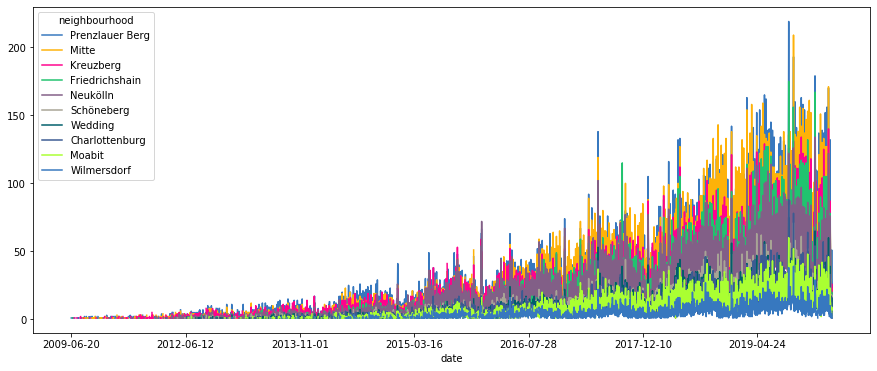

In [155]:
df_Bezirke[top_10].plot()

In [156]:
df_Bezirke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3329 entries, 2009-06-20 to 2020-03-17
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Adlershof                  255 non-null    float64
 1   Alt-Hohenschönhausen       932 non-null    float64
 2   Alt-Treptow                1213 non-null   float64
 3   Altglienicke               1031 non-null   float64
 4   Baumschulenweg             914 non-null    float64
 5   Biesdorf                   614 non-null    float64
 6   Blankenburg                238 non-null    float64
 7   Bohnsdorf                  153 non-null    float64
 8   Britz                      519 non-null    float64
 9   Buch                       115 non-null    float64
 10  Buckow                     400 non-null    float64
 11  Charlottenburg             2365 non-null   float64
 12  Charlottenburg-Nord        223 non-null    float64
 13  Dahlem                     392 non-nul

In [157]:
df_Bezirke = df_Bezirke.reset_index()
df_Bezirke['date'] = pd.to_datetime(df_Bezirke['date'])

In [158]:
df_Bezirke = df_Bezirke.resample('W', on='date').sum()

In [159]:
#sns.set_style??

In [160]:
#sns.set_style??

In [161]:
sns.set_style("darkgrid")

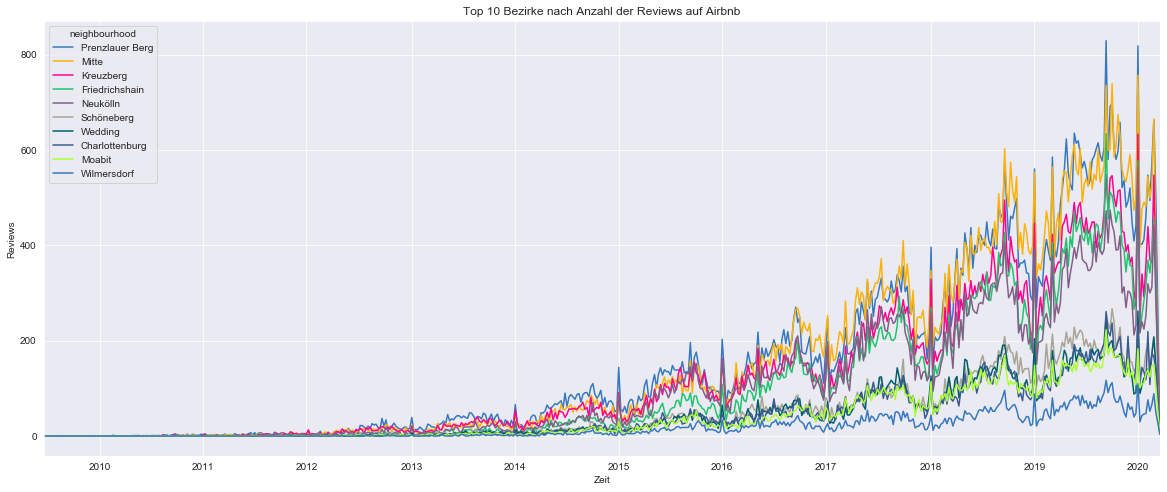

In [163]:
df_Bezirke[top_10].plot()
plt.rcParams['figure.figsize'] = [20, 8]

plt.title('Top 10 Bezirke nach Anzahl der Reviews auf Airbnb')
plt.xlabel('Zeit')
plt.ylabel('Reviews')
#plt.show()

plt.savefig('Top10_nach_Bezirken.png')

In [164]:
df_Bezirke_aktuell = df_Bezirke[(df_Bezirke.index > '2014-01-01')]

In [165]:
df_Bezirke_aktuell[top_10]

neighbourhood,Prenzlauer Berg,Mitte,Kreuzberg,Friedrichshain,Neukölln,Schöneberg,Wedding,Charlottenburg,Moabit,Wilmersdorf
date,,,,,,,,,,
2014-01-05,66.0,46.0,54.0,26.0,30.0,9.0,13.0,9.0,3.0,5.0
2014-01-12,28.0,23.0,27.0,6.0,11.0,6.0,7.0,5.0,0.0,0.0
2014-01-19,22.0,25.0,17.0,8.0,4.0,5.0,8.0,4.0,4.0,2.0
2014-01-26,24.0,17.0,20.0,8.0,14.0,6.0,9.0,1.0,3.0,1.0
2014-02-02,19.0,13.0,13.0,8.0,6.0,5.0,3.0,5.0,1.0,0.0
2014-02-09,20.0,16.0,23.0,5.0,14.0,4.0,7.0,2.0,2.0,1.0
2014-02-16,28.0,28.0,32.0,11.0,17.0,5.0,8.0,6.0,5.0,0.0
2014-02-23,27.0,32.0,22.0,16.0,16.0,6.0,6.0,3.0,6.0,1.0
2014-03-02,40.0,13.0,28.0,12.0,17.0,4.0,4.0,5.0,5.0,1.0


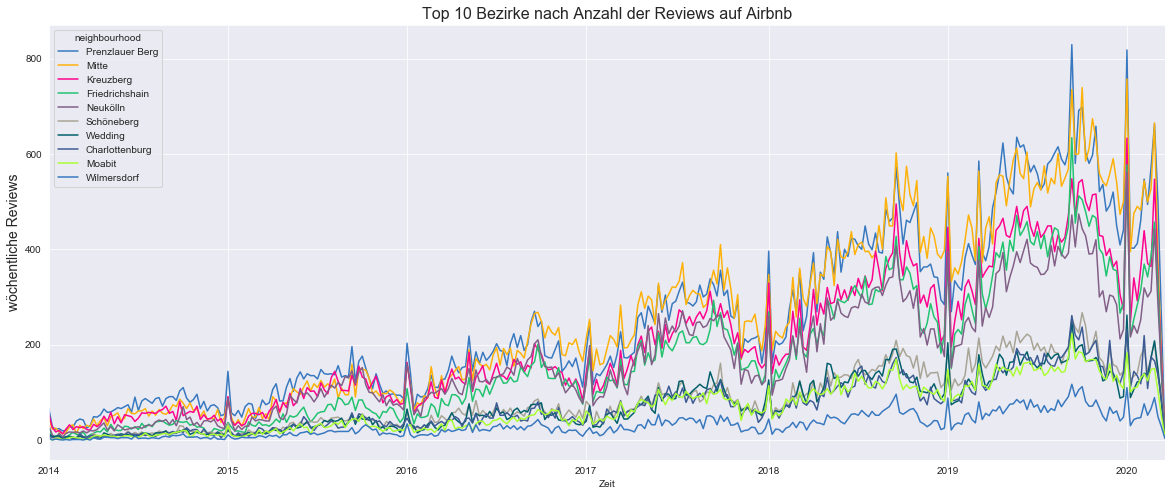

In [166]:
df_Bezirke_aktuell[top_10].plot()
plt.rcParams['figure.figsize'] = [20, 8]

plt.title('Top 10 Bezirke nach Anzahl der Reviews auf Airbnb', fontsize = 16)
plt.xlabel('Zeit')
plt.ylabel('wöchentliche Reviews', fontsize = 14)
#plt.show()

plt.savefig('Top_10.png')

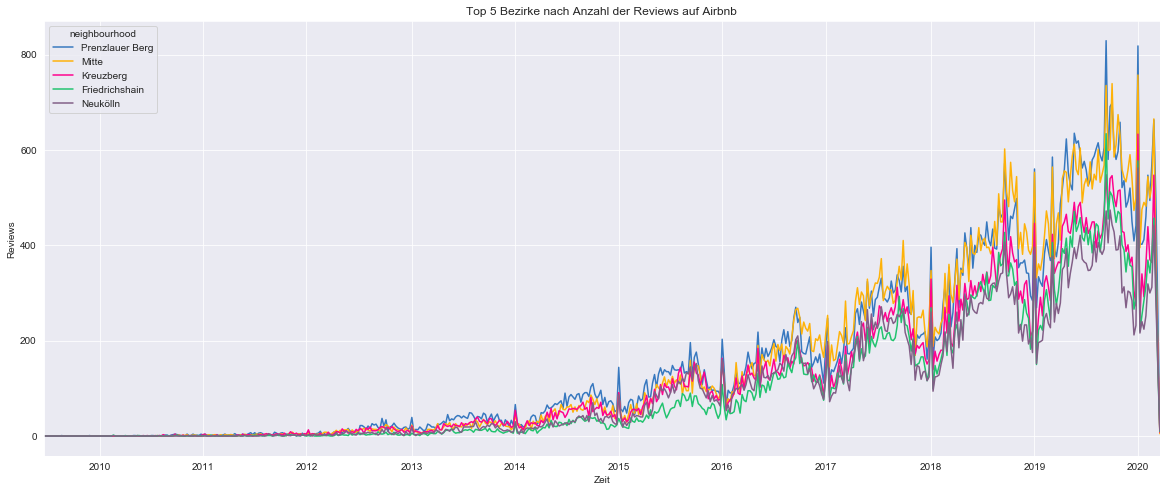

In [167]:
df_Bezirke[top_5].plot()
plt.rcParams['figure.figsize'] = [15, 6]



plt.title('Top 5 Bezirke nach Anzahl der Reviews auf Airbnb')
plt.xlabel('Zeit')
plt.ylabel('Reviews')
plt.show()

<Figure size 1440x1152 with 0 Axes>

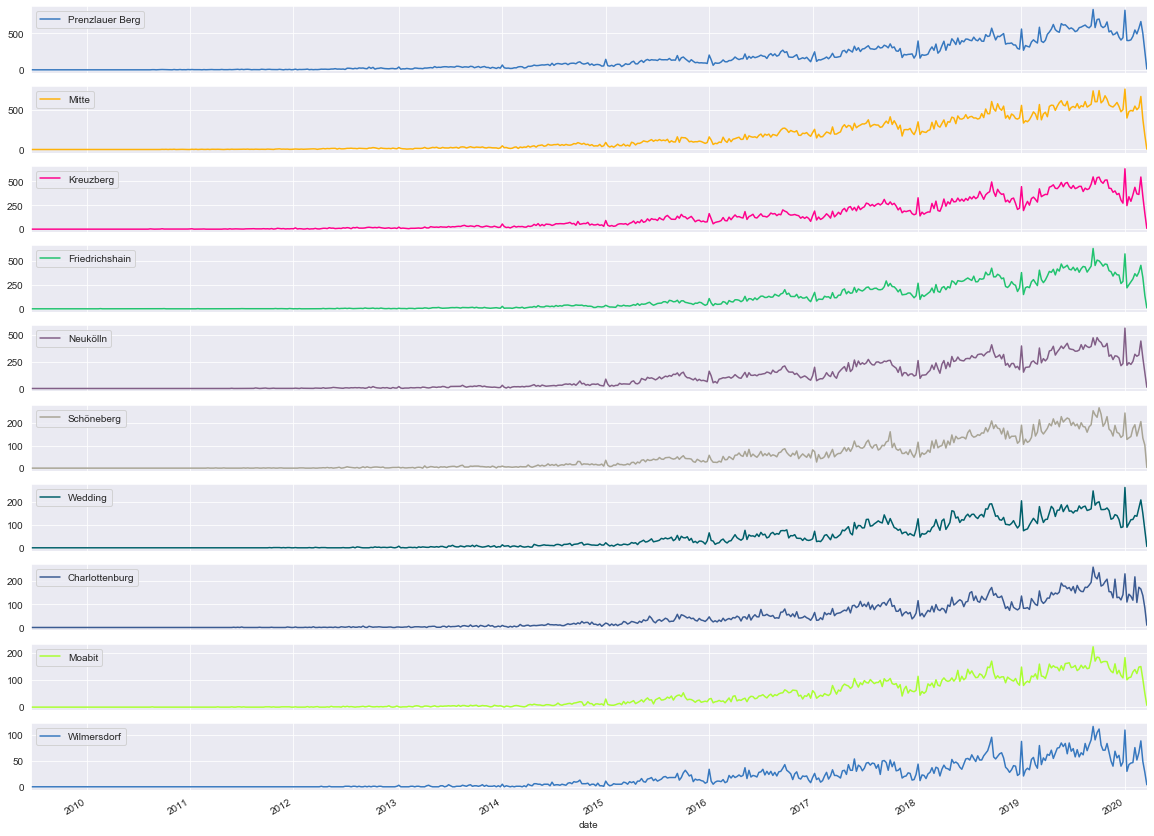

In [168]:
plt.rcParams['figure.figsize'] = [20, 16]
fig = plt.figure()
df_Bezirke[top_10].plot(subplots=True)
plt.show()